### Ejercicio 7
Re-implemente el modelo del ejercicio 4 (Balance.csv) utilizando un Multiperceptrón Tensorflow/Keras.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

df = pd.read_csv('balance-scale.csv')

X = df.drop("Inclinacion", axis=1)
y = df["Inclinacion"].map({'L': 0, 'B': 1, 'R': 2})  # Convertir etiquetas a números

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df["Inclinacion"])


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(2, activation='tanh'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=0)

accuracy_test = model.evaluate(X_test, y_test)
print("Accuracy en el conjunto de prueba: {:.2f}%".format(accuracy_test[1] * 100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9760 - loss: 0.0882 
Accuracy en el conjunto de prueba: 97.60%


### Ejercicio 8
Utilizando el archivo Iris.csv que contiene información referida a la longitud y al ancho de sépalos y pétalos
de tres especies de flores: iris setosa, iris versicolor e iris virginica.

a) Entrenar una multiperceptrón que aprenda a clasificar las 3 clases de flores.

b) Utilice Python para calcular la matriz de confusión y calcule de forma manual las métricas de precision,
recall, accuracy y f1-score. Luego utilice la función classification_report de SciKit-Learn para
comparar los resultados.

In [2]:
df = pd.read_csv("Iris.csv")

X = df.drop("class", axis=1)
y = df["class"].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(2, activation='tanh'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=0)

accuracy_test = model.evaluate(X_test, y_test)
print("Accuracy en el conjunto de prueba: {:.2f}%".format(accuracy_test[1] * 100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 1.0000 - loss: 0.0517
Accuracy en el conjunto de prueba: 100.00%


In [3]:
# Calcular matriz de confusión 
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
cm = confusion_matrix(y_test, y_pred_classes)
print("Matriz de confusión:\n", cm)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Matriz de confusión:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [4]:
import numpy as np

precision = np.zeros(3)
for i in range(0, len(cm)):
    suma_columna = 0
    for j in range(0, len(cm)):
        suma_columna += cm[j][i]
    precision[i] = cm[i][i] / suma_columna

print("Precision por clase:", precision)

Precision por clase: [1. 1. 1.]


In [5]:
recall = np.zeros(3)
for i in range(0, len(cm)):
    suma_fila = sum(cm[i])
    recall[i] = cm[i][i] / suma_fila

print("Recall por clase:", recall)

Recall por clase: [1. 1. 1.]


In [6]:
f1_score = np.zeros(3)
for i in range(0, len(cm)):
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

print("F1-score por clase:", f1_score)

F1-score por clase: [1. 1. 1.]


### Ejercicio 9
Utilizando los ejemplos del archivo AUTOS.csv genere un modelo utilizando un multiperceptrón para
predecir el precio del auto (atributo price) y la cantidad de millas por galón en ruta (MPG-highway) en
función del resto de los atributos. Recuerde completar los valores faltantes, utilizar normalización y dividir
el dataset en entrenamiento y validación (80/20).

Realice 20 ejecuciones independientes de cada configuración seleccionada calculando las épocas
promedio y al error cuadrático medio (ECM). Analice los resultados y respalde las afirmaciones referidas a
los resultados obtenidos. Utilice un máximo de 1000 épocas con lotes de 50 e implemente una parada
temprana con paciencia de 15.

Complete la siguiente tabla y realice un análisis de los valores obtenidos

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

df = pd.read_csv("autos.csv", na_values=['?', '??', 'NA', '', 'null'])
df = df.select_dtypes(include = np.number)

print(df.isnull().sum())


values = {'normalized-losses': df['normalized-losses'].mean(),
          'bore': df['bore'].mean(),
          'stroke': df['stroke'].mean(),
          'horsepower': df['horsepower'].mean(),
          'peak-rpm': df['peak-rpm'].mean(),
          'price': df['price'].mean()}

# reemplaza valores nulos por los indicados en el diccionario values
df = df.fillna(value=values)

datos = np.array(df)
attPred = [12,14] #12 mpg-highway y 14 precio  #-- nro de atributos a predecir
T = datos[:, attPred]
X = np.delete(datos, attPred, 1) # elimina columnas de atributos a predecir

data_scaler, target_scaler = StandardScaler(), StandardScaler()
X = data_scaler.fit_transform(X)
T = target_scaler.fit_transform(T)

x_train, x_val, y_train, y_val = train_test_split(X, T, test_size = 0.2,  shuffle = True)

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [61]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU


# Ajustar la salida del modelo al número de variables objetivo (2 en este caso)
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(6, activation='sigmoid'),
    Dense(3, activation='sigmoid'),
    Dense(y_train.shape[1], activation='linear')  
])
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae','mse'])
early_stop = EarlyStopping(monitor='val_loss', patience=15)

# Entrena el modelo y guarda la historia del progreso
history = model.fit(x = x_train, y = y_train, batch_size = 50, epochs = 1000, validation_data = (x_val, y_val), callbacks=[early_stop])


epocas_entrenadas = len(history.epoch)
mse_val_promedio = np.mean(history.history['val_mse'])

print(f"Épocas entrenadas: {epocas_entrenadas}")
print(f"Error cuadrático medio promedio en validación: {mse_val_promedio:.4f}")


Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.8750 - mae: 0.8750 - mse: 1.2319 - val_loss: 0.9542 - val_mae: 0.9542 - val_mse: 1.5647
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8673 - mae: 0.8673 - mse: 1.2072 - val_loss: 0.9476 - val_mae: 0.9476 - val_mse: 1.5435
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8623 - mae: 0.8623 - mse: 1.1907 - val_loss: 0.9420 - val_mae: 0.9420 - val_mse: 1.5251
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8578 - mae: 0.8578 - mse: 1.1772 - val_loss: 0.9364 - val_mae: 0.9364 - val_mse: 1.5073
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8533 - mae: 0.8533 - mse: 1.1631 - val_loss: 0.9309 - val_mae: 0.9309 - val_mse: 1.4914
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8491 - mae: 0.8491 - mse: 1.1511 - val_loss: 0.9256 - val_mae: 0.9256 - val_mse: 1.4746
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8449 - mae: 0.8449 - mse: 1.1380 - val_loss: 

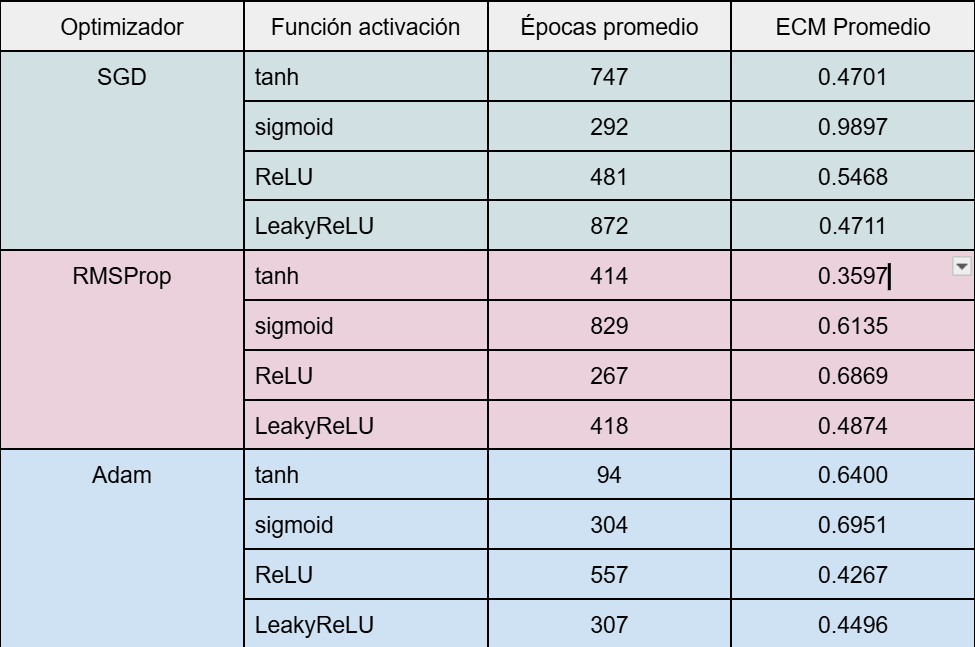

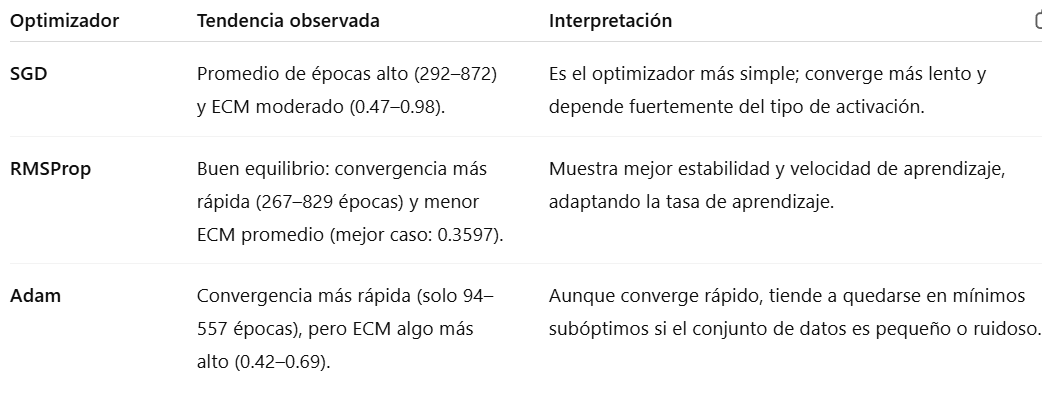